SBI Assignment 11
Autors: Marina Dittschar und Clarissa Auckenthaler

In [1]:
import pandas as pd 
from sklearn import datasets, linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

Task 1: Load breast-cancer dataset and report on it

In [2]:
#Load data
data = pd.read_csv("breast-cancer-wisconsin.data", sep=",",header=None,names=["ID","Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape", "Marginal_Adhesion",
                                                                  "Single_Epithelial_Cell_Siz","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"], na_values=["?"]) 

Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [3]:
data

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [4]:
data = data.apply(pd.to_numeric)
data.describe()

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
data_no_NaN= data.dropna()

Task 2: Train a SVM to predict the class of each sample

In [6]:
X = data_no_NaN.loc[:, ~data.columns.isin(['ID', 'Class'])]
y = data_no_NaN.Class
C = 1 
clf = svm.SVC(kernel='linear', C=C, random_state=1)
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[432,  12],
       [ 10, 229]], dtype=int64)

Task 3:  ROC curves

In [9]:
# Data of Class is converted into Binary Data
df_one = pd.get_dummies(data_no_NaN["Class"])
# Binary Data is Concatenated into df
df_two = pd.concat((df_one, data_no_NaN), axis=1)
df_two = df_two.drop(["Class"], axis=1)
df_two = df_two.drop([2], axis=1)
# Rename the Column
df_binary_Class = df_two.rename(columns={4: "Class"})

In [10]:
df_binary_Class

,Class,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0,1000025,5,1,1,1,2,1.0,3,1,1
1,0,1002945,5,4,4,5,7,10.0,3,2,1
2,0,1015425,3,1,1,1,2,2.0,3,1,1
3,0,1016277,6,8,8,1,3,4.0,3,7,1
4,0,1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
694,0,776715,3,1,1,1,3,2.0,1,1,1
695,0,841769,2,1,1,1,2,1.0,1,1,1
696,1,888820,5,10,10,3,7,3.0,8,10,2
697,1,897471,4,8,6,4,3,4.0,10,6,1


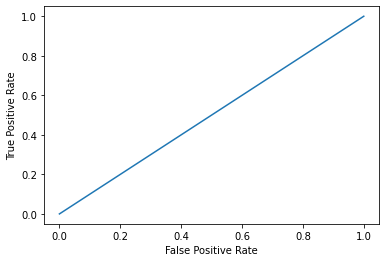

In [11]:
#gausian kernel
X = df_binary_Class.loc[:, ~data.columns.isin(['ID', 'Class'])]
y = df_binary_Class.Class
clf = svm.SVC(kernel='rbf', C=C, random_state=1)
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
rbf_fpr, rbf_tpr, rbf_thresholds = roc_curve(y, y_pred)
roc_display = RocCurveDisplay(fpr=rbf_fpr, tpr=rbf_fpr).plot()

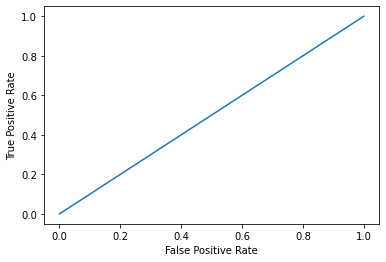

In [12]:
clf = svm.SVC(kernel='sigmoid', C=C, random_state=1)
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
sigmoid_fpr, sigmoid_tpr, sigmoid_thresholds = roc_curve(y, y_pred)
roc_display = RocCurveDisplay(fpr=sigmoid_fpr, tpr=sigmoid_fpr).plot()

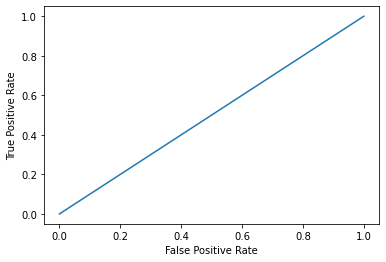

In [13]:
clf = svm.SVC(kernel='poly',degree = 2, C=C, random_state=1)
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
poly_fpr, poly_tpr, poly_thresholds = roc_curve(y, y_pred)
roc_display = RocCurveDisplay(fpr=poly_fpr, tpr=poly_fpr).plot()

In [ ]:
clf = svm.SVC(kernel='linear', C=C, random_state=1)
y_pred = cross_val_predict(clf, X, y, cv=5)
linear_fpr, linear_tpr, linear_thresholds = roc_curve(y, y_pred)
roc_display = RocCurveDisplay(fpr=linear_fpr, tpr=linear_fpr).plot()